In [1]:
import torch
from torch.utils.data import DataLoader
from datasets.cfg import num_classes, max_size
from datasets.loader import DataModule, DataConfig
from datasets.base import collate_bb
from train.eval import Evaluator
import mlflow.pytorch
device = torch.device("cuda")
from models.models import build_model
model_B = build_model("maskrcnn_r50_fpn", num_classes).to(device)
model_B.load_state_dict(torch.load("./weights/maskrcnn_B_ep40.pth", map_location="cuda"))

model_uri = "file:///media/sdb1/mlflow/753485487056022103/2e19afb3d8e34c7fa8b50505a7dd259e/artifacts/model"
model_AB_Att = mlflow.pytorch.load_model(model_uri)

/home/neoph/dev/Train/.tenv312/lib/python3.12/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.Op.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
/home/neoph/dev/Train/.tenv312/lib/python3.12/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.OnnxFunction.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
/tmp/ipykernel_1471863/6473638.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for

In [2]:
data = DataModule(DataConfig())
e = Evaluator(device)


Examples: B-test, B model


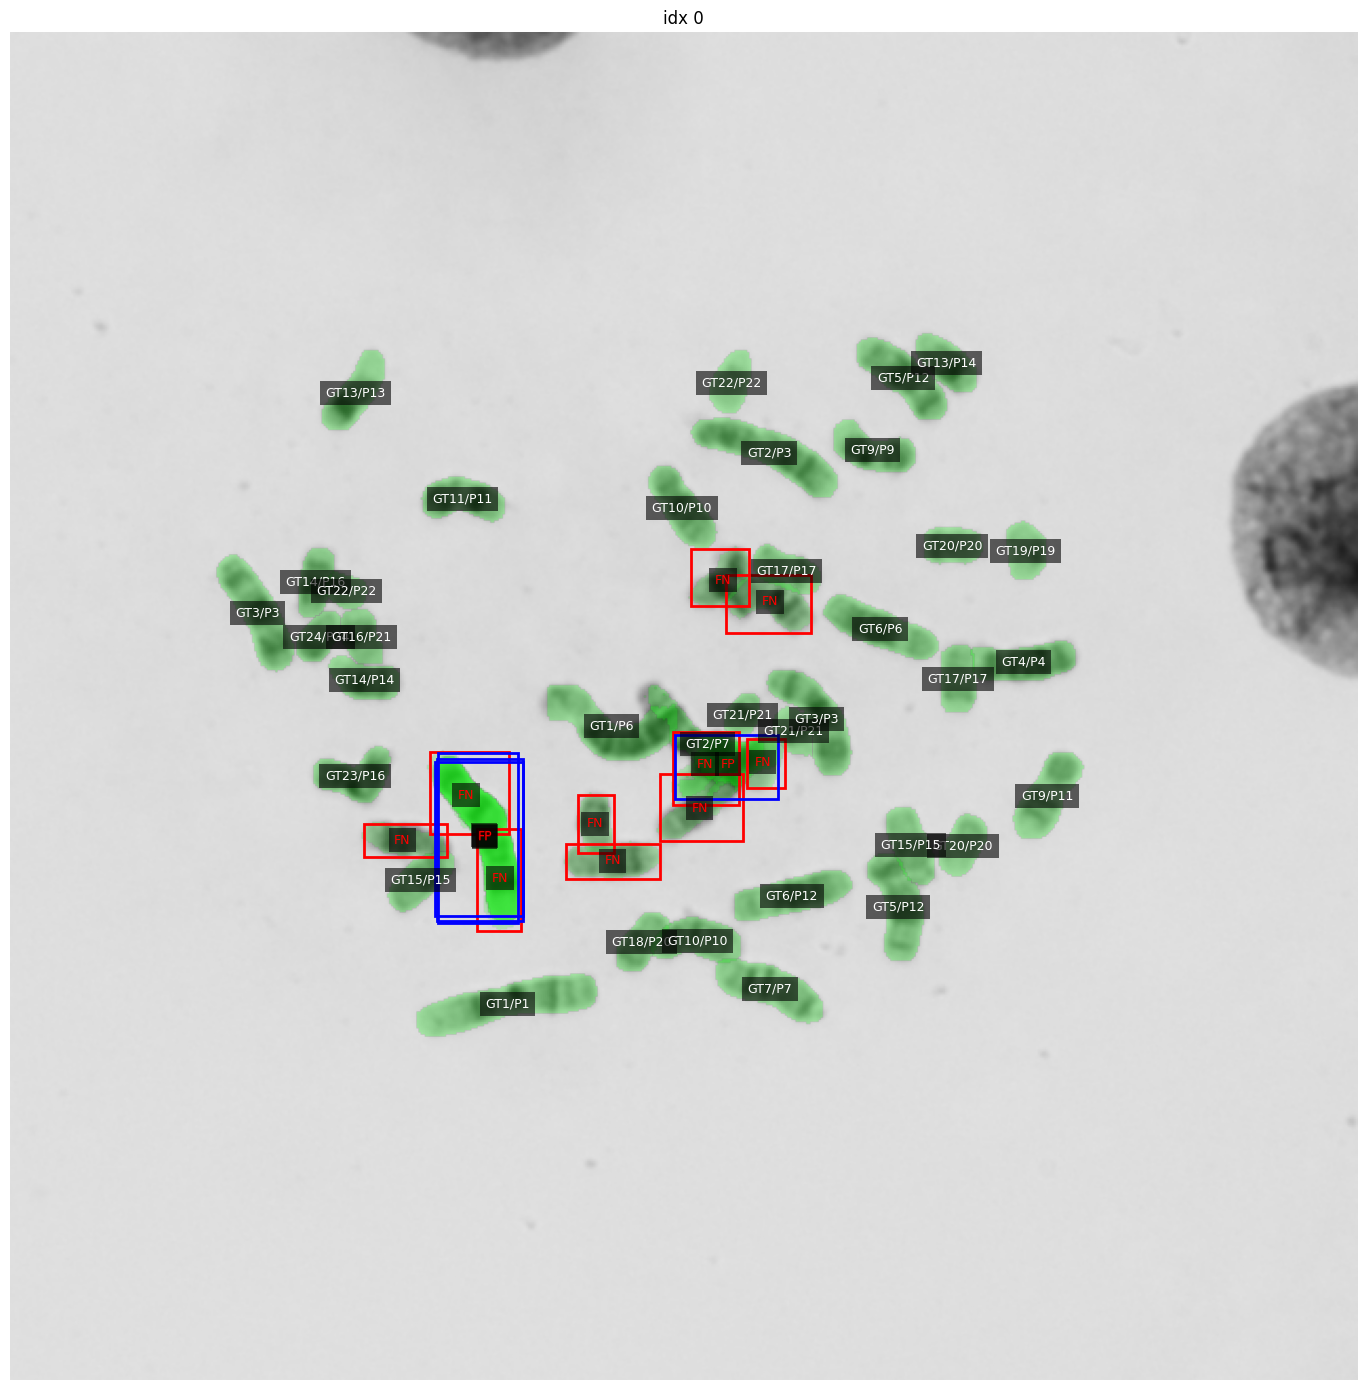

In [3]:
e.show_examples(data.ds_b_test, model_B,  n=1, score_thresh=0.5, title="B-test, B model")


Examples: D-test, B model


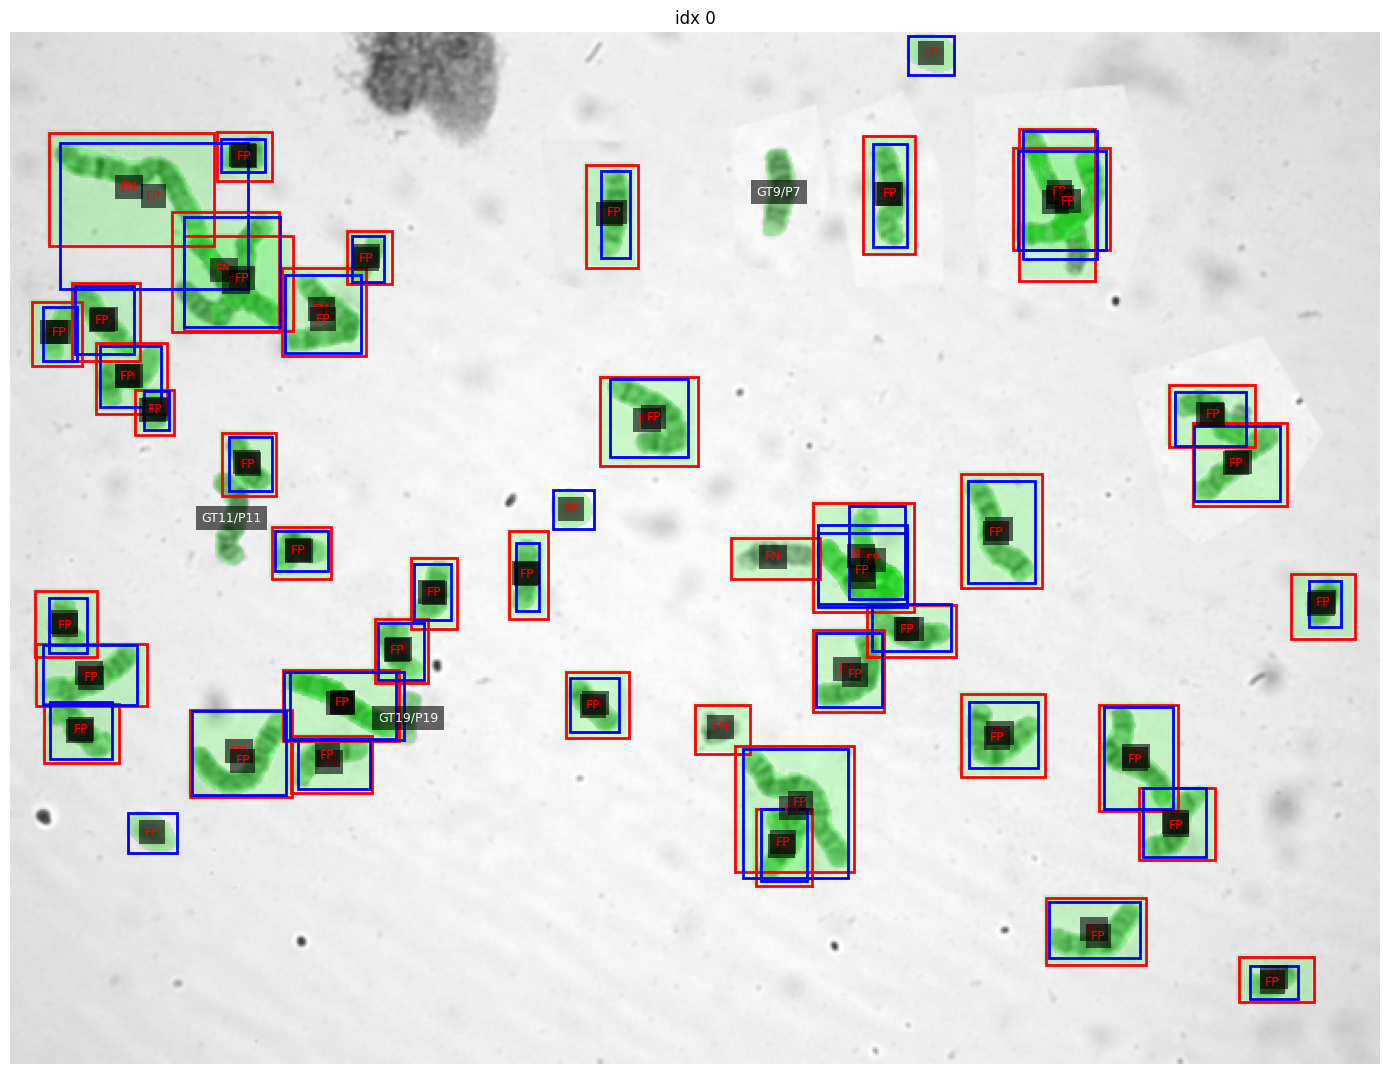


Examples: D-test, Att model


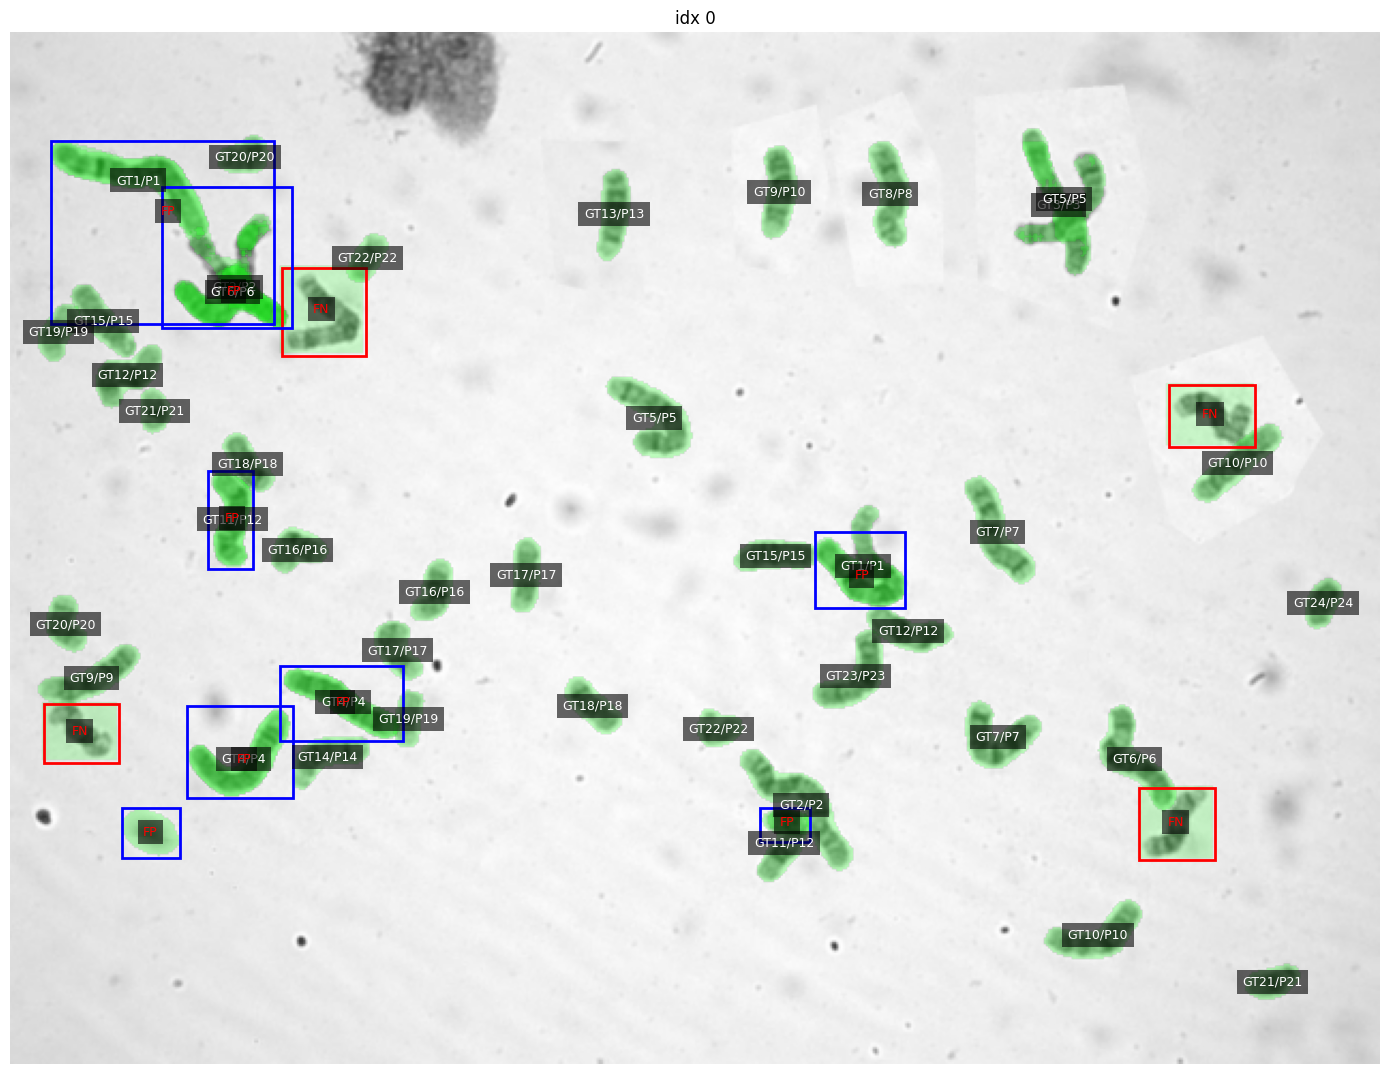

In [4]:
e.show_examples(data.ds_a_val, model_B,  n=1, score_thresh=0.5, title="D-test, B model")
e.show_examples(data.ds_a_val, model_AB_Att, n=1, score_thresh=0.5, iou_thresh=0.2, title="D-test, Att model")

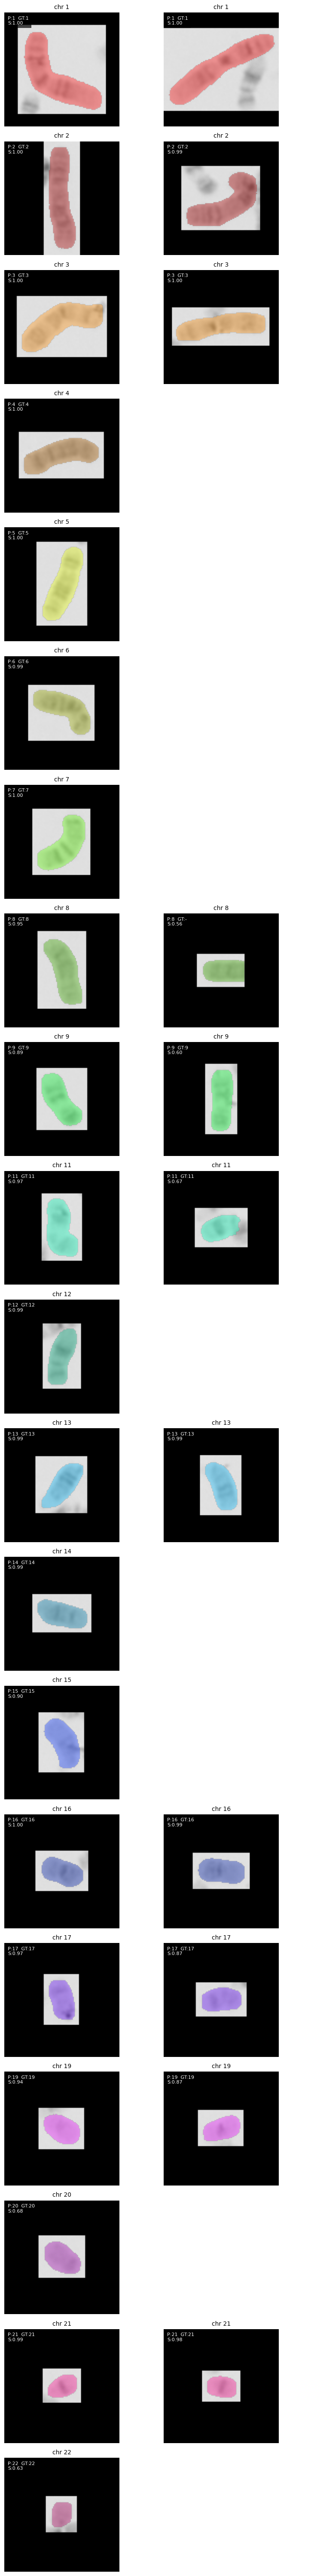

In [6]:
from train.karyo_plotting4 import plot_karyogram_from_output

def plot_karyogram_from_dataset(dataset, model, idx=0, score_thresh=0.5, pad=5):
    model.eval()
    img_t, target = dataset[idx]
    img_t = img_t.to(device)

    with torch.no_grad():
        out = model([img_t])[0]

    plot_karyogram_from_output(img_t.cpu(), out, target, idx=idx, score_thresh=score_thresh, pad=pad)

plot_karyogram_from_dataset(data.ds_b_test, model_AB_Att, idx= 1)